In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('UrbanParkRangerAnimalConditionResponse.csv')
selected_columns = df[['Date and Time of initial call', 'Date and time of Ranger response', 'Species Description', 'Call Source',
       'Species Status', 'Animal Condition', 'Age', 'Animal Class', 'Final Ranger Action', '# of Animals',
       'Rehabilitator', 'ACC Intake Number']]

In [3]:
pip install xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 2.8 MB/s eta 0:00:00


In [4]:
output_file = 'output.xlsx'  #Save as Excel file
with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
    #Write the filtered data to the "Importable Table" sheet
    selected_columns.to_excel(writer, sheet_name='Importable Table', index=False)
print(f"Filtered data has been saved to {output_file} with the sheet name 'Importable Table'.")

Filtered data has been saved to output.xlsx with the sheet name 'Importable Table'.


In [5]:
data = pd.read_excel('output.xlsx')
data.head()

,Date and Time of initial call,Date and time of Ranger response,Species Description,Call Source,Species Status,Animal Condition,Age,Animal Class,Final Ranger Action,# of Animals,Rehabilitator,ACC Intake Number
0,06/23/2021 04:45:00 PM,06/24/2021 08:00:00 AM,Chukar,Other,Exotic,Healthy,Adult,Birds,ACC,6.0,NaN,163537
1,06/24/2021 10:00:00 AM,06/24/2021 11:00:00 AM,Sparrow,Central,Native,Healthy,Infant,Birds,Rehabilitator,4.0,NaN,NaN
2,06/23/2021 02:30:00 PM,06/23/2021 02:30:00 PM,White-tailed Deer,Employee,Native,NaN,Juvenile,Deer,Unfounded,0.0,NaN,NaN
3,06/23/2021 01:00:00 PM,06/23/2021 01:10:00 PM,Raccoon,Employee,Native,NaN,Adult;#Juvenile,Small Mammals-RVS,Unfounded,0.0,NaN,NaN
4,06/23/2021 09:20:00 AM,06/23/2021 09:20:00 AM,Virginia Opossum,Central,Native,Healthy,Juvenile,Small Mammals-non RVS,ACC,1.0,NaN,119833


In [6]:
data['Date and Time of initial call'] = pd.to_datetime(data['Date and Time of initial call'])
data['Date and time of Ranger response'] = pd.to_datetime(data['Date and time of Ranger response'])

<ipython-input-6-8d46ae15ee45>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date and Time of initial call'] = pd.to_datetime(data['Date and Time of initial call'])


***1) Analyzed trends in the number of animals sent to rehabilitators and animal care centres over time.***

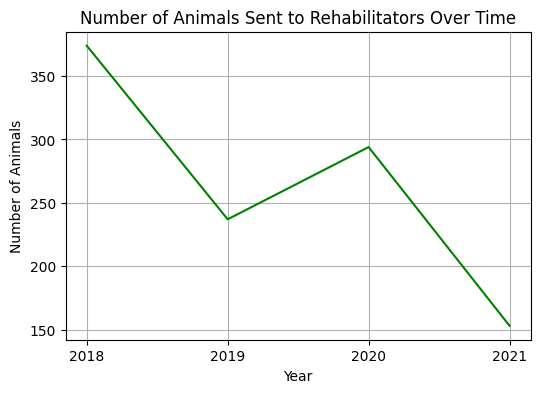

In [7]:
data['year'] = data['Date and Time of initial call'].dt.year
animals_sent = data[(data['Final Ranger Action'] == 'Rehabilitator')|( data['Final Ranger Action'] == 'ACC')].groupby(data['Date and Time of initial call'].dt.year).size()

#Plotting
ticks_data = sorted(data['Date and Time of initial call'].dt.year.unique())
date_format = mdates.DateFormatter('%Y')  #Format for only the year
plt.figure(figsize=(6, 4))
animals_sent.plot(kind='line', color='green')  #Set line color to green
plt.title('Number of Animals Sent to Rehabilitators Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Animals')
plt.xticks(ticks_data)
plt.grid()
plt.show()

In [8]:
#Filter the data for animals sent to rehabilitators or animal care centers
rehab_data = data[data['Final Ranger Action'].str.contains('Rehabilitator|ACC', case=False, na=False)]

#Extract the year from the 'Date and Time of initial call'
rehab_data['Year'] = rehab_data['Date and Time of initial call'].dt.year

#Pivot the data to get 'Year' as rows and 'Final Ranger Action' as columns, counting the number of animals sent
rehab_count_pivot = rehab_data.pivot_table(index='Year', columns='Final Ranger Action', aggfunc='size',fill_value=0).reset_index()

#Display the result
print(rehab_count_pivot)

Final Ranger Action  Year  ACC  Rehabilitator
0                    2018  332             42
1                    2019  173             64
2                    2020  173            121
3                    2021   98             55


<ipython-input-8-d5bdaf9db7a0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rehab_data['Year'] = rehab_data['Date and Time of initial call'].dt.year


Based on the code, data output, and provided line graph, here’s an analysis of the trend in the number of animals sent to rehabilitators and animal care centers (ACC) over time:

1. **2018**: The number of animals sent to either ACC (332) or rehabilitators (42) was the highest in this year, totaling 374 animals.
2. **2019**: There was a noticeable drop, with 173 animals sent to ACC and 64 to rehabilitators, totaling 237 animals. This marks a significant decline from the previous year.
3. **2020**: The trend reversed slightly, with 173 animals sent to ACC and an increased 121 sent to rehabilitators, totaling 294 animals. This suggests an increase in the number of animals needing care.
4. **2021**: The downward trend continued, with a further reduction to 98 animals sent to ACC and 55 to rehabilitators, totaling 153 animals — the lowest in the observed period.

**Summary**: Overall, the trend shows a significant decrease from 2018 to 2021 in the total number of animals sent for care, with a slight increase in 2020. The shift could suggest various factors, such as changes in reporting, animal population dynamics, or shifts in intervention policies. The number of animals sent to rehabilitators rose notably in 2020, even as overall numbers fell.

***2) Examined changes in the types of animals reported over time.***

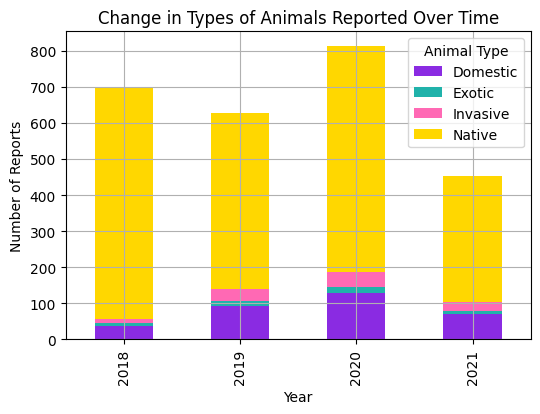

In [9]:
#Group by year and type of animal
animal_types = data.groupby([data['Date and Time of initial call'].dt.year, 'Species Status']).size().unstack(fill_value=0)

#Define custom colors
colors = ['#8a2be2', '#20b2aa', '#ff69b4', '#ffd700']  # Purple, Teal, Pink, Gold

#Plotting
animal_types.plot(kind='bar', stacked=True, figsize=(6, 4), color=colors)
plt.title('Change in Types of Animals Reported Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Reports')
plt.legend(title='Animal Type')
plt.grid()
plt.show()

In [10]:
#Group by year and animal type, then count the occurrences
animal_type_count = data.groupby([data['Date and Time of initial call'].dt.year, 'Species Status']).size().unstack(fill_value=0)

#Display the result
animal_type_count

Species Status,Domestic,Exotic,Invasive,Native
Date and Time of initial call,,,,
2018,37,8,12,642
2019,93,13,35,486
2020,128,17,43,625
2021,71,8,25,350


In [11]:
#Group by year and animal type, then count the occurrences
animal_type_count1 = data.groupby([data['Date and Time of initial call'].dt.year, 'Species Description']).size().unstack(fill_value=0)

#Display the result
animal_type_count1

Species Description,Alligator Snapping Turtle,American Alligator,American Bullfrog,American Coot,American Crow,American Goldfinch,American Kestrel,American Oystercatcher,American Robin,American Woodcock,...,Wood Thrush,Woodpecker (Unknown),Wren (Unknown),Yellow-bellied Sapsucker,Yellow-bellied Slider,Yellow-crowned Night Heron,Yellow-headed Blackbird,house sparrow,mallard duck,raccoon
Date and Time of initial call,,,,,,,,,,,,,,,,,,,,,
2018,1,0,0,0,1,0,1,1,0,3,...,0,0,0,2,0,1,0,0,1,34
2019,0,1,1,0,1,1,0,0,13,2,...,0,2,0,0,1,0,0,1,0,0
2020,0,0,1,1,5,0,5,4,13,3,...,1,0,0,0,1,1,4,0,0,0
2021,0,0,0,0,0,0,3,1,5,0,...,0,0,1,0,1,0,0,0,0,0


Based on the data and the bar chart provided, here’s how the types of animals being reported have changed over time:

1. **Native Animals**:
   - Native animals represent the largest portion of reports each year. Although there is some fluctuation, their numbers are generally decreasing over time, with a significant drop from 2018 (642 reports) to 2021 (350 reports). This suggests a trend of fewer native animals being reported each year.

2. **Domestic Animals**:
   - Reports of domestic animals show an increase from 2018 to 2020, peaking at 128 reports in 2020, before dropping to 71 reports in 2021. This rise and fall could be due to varying circumstances each year, possibly reflecting changes in interactions with domestic animals or increased reporting.

3. **Invasive Species**:
   - Invasive species reports increase steadily from 2018 to 2020, with a peak of 43 reports in 2020, followed by a slight decrease in 2021. This upward trend until 2020 might indicate growing awareness or presence of invasive species in the region.

4. **Exotic Animals**:
   - Reports of exotic animals remain relatively low and stable over the years, with only slight fluctuations. This suggests that exotic species are either rare or less frequently encountered by the public, resulting in fewer reports.

**Summary**:
The data indicates a general decline in reports of native animals over time, while domestic and invasive species show an increasing trend until 2020. This shift could reflect ecological changes, shifts in human-animal interactions, or changes in public awareness and reporting behavior. Exotic species have consistently low numbers, indicating they are not a significant portion of animal reports.

***3) Examined how call sources changed over time.***

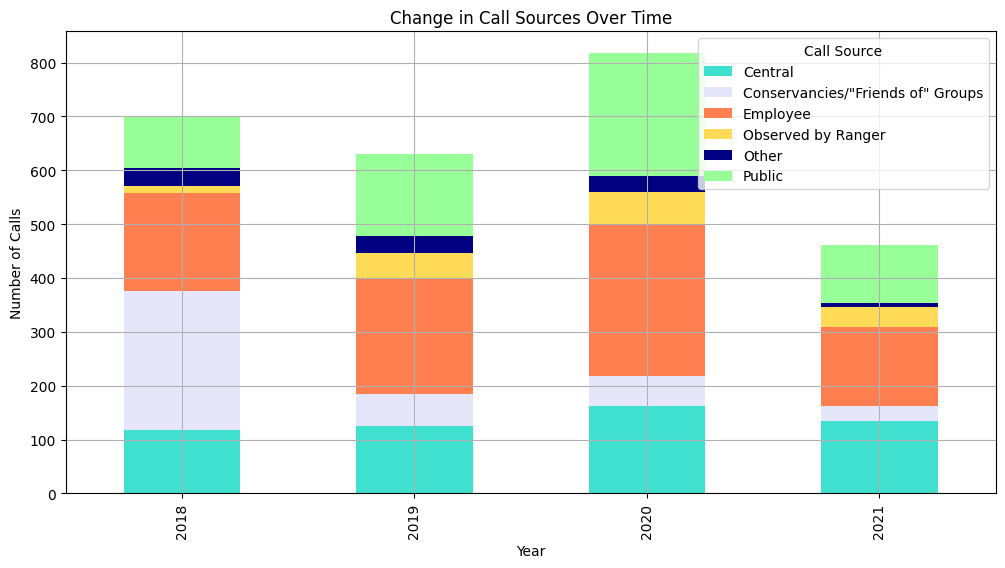

In [12]:
#Group by year and call source
call_sources = data.groupby([data['Date and Time of initial call'].dt.year, 'Call Source']).size().unstack(fill_value=0)

#Define custom colors
colors = ['#40e0d0', '#e6e6fa', '#ff7f50', '#ffdb58', '#000080', '#98ff98']  # Turquoise, Lavender, Coral, Mustard, Navy, Mint

#Plotting
call_sources.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)
plt.title('Change in Call Sources Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Calls')
plt.legend(title='Call Source')
plt.grid()
plt.show()

In [13]:
#Group by year and call source, then count the occurrences
call_source_count = data.groupby([data['Date and Time of initial call'].dt.year, 'Call Source']).size().unstack(fill_value=0)

#Display the result
call_source_count

Call Source,Central,"Conservancies/""Friends of"" Groups",Employee,Observed by Ranger,Other,Public
Date and Time of initial call,,,,,,
2018,117,259,182,12,35,95
2019,125,60,213,48,33,152
2020,163,55,281,61,29,228
2021,134,29,147,36,8,107


Based on the data, chart, and code output, here’s how the sources of information (call sources) have changed over time:

1. **Central**:
   - The number of calls from the "Central" source has been relatively consistent over the years, ranging from 117 in 2018 to a peak of 163 in 2020, followed by a slight decrease to 134 in 2021.

2. **Conservancies/"Friends of" Groups**:
   - Calls from conservancies or "Friends of" groups have decreased significantly over time. They started at 259 calls in 2018, then sharply dropped to 60 in 2019, and further decreased to 29 by 2021. This indicates a declining trend in reporting from these groups.

3. **Employee**:
   - The "Employee" source shows an increasing trend from 182 calls in 2018 to a peak of 281 in 2020, followed by a notable drop to 147 in 2021. This suggests that employees were more active in reporting during the middle of this period, particularly in 2020.

4. **Observed by Ranger**:
   - Reports observed by rangers have generally increased, starting from only 12 in 2018, rising to 61 in 2020, and then slightly decreasing to 36 in 2021. This suggests an upward trend in ranger-reported cases, though it dropped somewhat after 2020.

5. **Other**:
   - Calls categorized as "Other" have been relatively low and consistent, with numbers ranging from 35 in 2018 to a low of 8 in 2021. This category does not seem to contribute significantly to the total number of calls.

6. **Public**:
   - Calls from the public show an increasing trend, from 95 in 2018 to 228 in 2020, then decreasing to 107 in 2021. This indicates a spike in public reports in 2020, possibly due to increased awareness or engagement, before falling again.

**Summary**:
Over time, there has been a general increase in call reports from the public and employees, particularly peaking in 2020, which may reflect a period of heightened awareness or activity. Meanwhile, calls from conservancies or "Friends of" groups have sharply declined, and reports observed by rangers have shown an upward trend until 2020, with a slight drop afterward.

In [14]:
with pd.ExcelWriter('output.xlsx', engine='xlsxwriter') as writer:
    selected_columns.to_excel(writer, sheet_name='Importable Table', index=False)
    #Exporting the output for each question into a separate sheet
    rehab_count_pivot.to_excel(writer, sheet_name='Q1-Animals Sent', index=False)
    animal_type_count.to_excel(writer, sheet_name='Q2-Animal Type Over Time', index=False)
    call_source_count.to_excel(writer, sheet_name='Q3-Call Source Over Time', index=False)
print("Data has been exported to 'output.xlsx' with separate sheets for each question.")

Data has been exported to 'output.xlsx' with separate sheets for each question.


In [15]:
#Initialize an empty list for building the publication table
publication_table_list = []

#Adding Question 1 (Animals Sent to Rehabilitators)
#Add a heading for Question 1
publication_table_list.append(pd.Series(["Question 1: Animals Sent to Rehabilitators", "", ""]))
publication_table_list.append(rehab_count_pivot)

#Adding an Empty Row for Separation
publication_table_list.append(pd.Series(["", "", ""], index=["Column 1", "Column 2", "Column 3"]))

#Adding Question 2 (Animal Type Over Time)
#Add a heading for Question 2
publication_table_list.append(pd.Series(["Question 2: Animal Type Over Time", "", ""]))
publication_table_list.append(animal_type_count)

#Adding an Empty Row for Separation
publication_table_list.append(pd.Series(["", "", ""], index=["Column 1", "Column 2", "Column 3"]))

#Adding Question 3 (Call Source Over Time)
#Add a heading for Question 3
publication_table_list.append(pd.Series(["Question 3: Call Source Over Time", "", ""]))
publication_table_list.append(call_source_count)

#Combine all the pieces into a single DataFrame
publication_table = pd.concat(publication_table_list, ignore_index=True)

#Export to Excel with Separate Sheets
with pd.ExcelWriter('output.xlsx', engine='xlsxwriter') as writer:
    selected_columns.to_excel(writer, sheet_name='Importable Table', index=False)

    #Exporting the output for each question into a separate sheet
    rehab_count_pivot.to_excel(writer, sheet_name='Q1-Animals Sent', index=False)
    animal_type_count.to_excel(writer, sheet_name='Q2-Animal Type Over Time', index=False)
    call_source_count.to_excel(writer, sheet_name='Q3-Call Source Over Time', index=False)

    #Export the consolidated "Publication Table"
    publication_table.to_excel(writer, sheet_name='Publication Table', index=False, header=False)
print("Data has been exported to 'output.xlsx' with separate sheets for each question and a consolidated 'Publication Table'.")

Data has been exported to 'output.xlsx' with separate sheets for each question and a consolidated 'Publication Table'.
